# Gridfonts

This notebook explores the datasets "gridfonts" and "figure-ground-a" based on Douglas Hofstadter and colleagues [Letter Spririt](https://cogsci.indiana.edu/letterspirit.html) project. See also [gridfonts](https://cogsci.indiana.edu/gridfonts.html).

This data was used in both Gary McGraw's and Douglas Blank's theses to train neural networks. See section 6.3.2 of [McGraw's thesis](http://goosie.cogsci.indiana.edu/farg/mcgrawg/thesis.html), and Blank's thesis [Learning to See Analogies: a Connectionist Exploration](https://repository.brynmawr.edu/compsci_pubs/78/).

* `figure-ground-a` is composed of letter a's 
* `gridfont` is composed of entire alphabets

In [1]:
import conx as cx

Using TensorFlow backend.
ConX, version 3.7.5


## Letterpart Analogies

First, we download and load the figure_ground_a dataset:

In [2]:
ds = cx.Dataset.get("figure_ground_a")

In [3]:
ds.summary()

_________________________________________________________________
Figure-Ground A:
Patterns    Shape                 Range                         
inputs      (153,)                (0, 1)                        
targets     [(153,), (153,)]      [(0, 1), (0, 1)]              
Total patterns: 229
   Training patterns: 229
   Testing patterns: 0
_________________________________________________________________


The figure_ground_a database is composed of 229 a's where:

* input - a 153 integer "picture" of an "a" representing 17 rows and 9 columns
* targets - two 153 pictures, representing the "brim" of the letter a, and the "body"

Let's display the letters in a graphical manner:

In [4]:
def display_letter_parts(letter, brim, body):
    print("Letter        Brim          Body")
    for row in range(17):
        for col in range(9):
            print("." if letter[row * 9 + col] == 0 else "X", end="")
        print("     ", end="")
        for col in range(9):
            print("." if brim[row * 9 + col] == 0 else "X", end="")
        print("     ", end="")
        for col in range(9):
            print("." if body[row * 9 + col] == 0 else "X", end="")
        print()

In [5]:
display_letter_parts(ds.inputs[0], ds.targets[0][0], ds.targets[0][1])

Letter        Brim          Body
.........     .........     .........
.........     .........     .........
.........     .........     .........
.........     .........     .........
....XXXXX     ....X....     ....XXXXX
...XX...X     ...X.....     ....X...X
..X.X...X     ..X......     ....X...X
.X..X...X     .X.......     ....X...X
X...X...X     X........     ....X...X
...X...X.     .........     ...X...X.
..X...X..     .........     ..X...X..
.X...X...     .........     .X...X...
XXXXX....     .........     XXXXX....
.........     .........     .........
.........     .........     .........
.........     .........     .........
.........     .........     .........


Let's design some networks that attempt to replicate the brim and body given the original gridfont letter.

First, let's change the format of the dataset input so that we can treat the input as a 2D 17 x 9 image rather than merely a vector of 153 values. We actually make it a 3D shape, the third dimension representing color (which it doesn't have).

In [6]:
ds.inputs.reshape(0, (17, 9, 1))

In [7]:
cx.shape(ds.inputs[0])

(17, 9, 1)

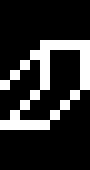

In [8]:
cx.array_to_image(ds.inputs[0], scale=10)

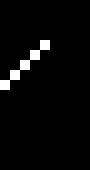

In [9]:
cx.array_to_image(ds.targets[0][0], scale=10, shape=(17,9))

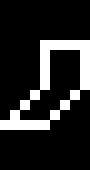

In [10]:
cx.array_to_image(ds.targets[0][1], scale=10, shape=(17,9))

We can now use a Convolutional Layer to better process the letter "picture". Notice that we flatten the output of the Convolutional layer to bring the output back into a single dimension.

In [11]:
net = cx.Network("Letterpart Analogies")
net.add(cx.Layer("input", (17, 9, 1)))
net.add(cx.Conv2DLayer("conv", 2, (2,2)))
net.add(cx.FlattenLayer("flatten"))
net.add(cx.Layer("hidden", 50, activation="relu"))
net.add(cx.Layer("brim", 153, vshape=(17, 9), activation="sigmoid"))
net.add(cx.Layer("body", 153, vshape=(17, 9), activation="sigmoid"))

net.connect("input", "conv")
net.connect("conv", "flatten")
net.connect("flatten", "hidden")
net.connect("hidden", "brim")
net.connect("hidden", "body")
net.compile(error="mse", optimizer="adam")

We associate the dataset to the network, and save 10 pictures for testing.

In [12]:
net.set_dataset(ds)
net.dataset.split(10)

In [13]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …

Now, we are ready to train the network to replicate the letter parts.

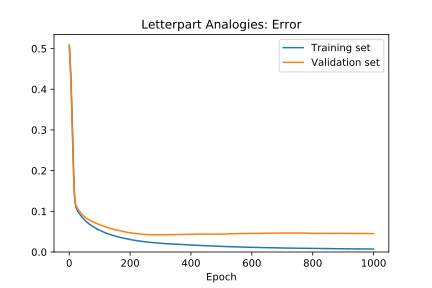

       |  Training |  Validate |      body |      brim |       val |       val 
Epochs |     Error |     Error |       acc |       acc |  body acc |  brim acc 
------ | --------- | --------- | --------- | --------- | --------- | --------- 
# 1000 |   0.00738 |   0.04522 |   0.82648 |   0.73973 |   0.40000 |   0.50000 


In [14]:
net.train(1000, accuracy=1.0, tolerance=0.4, batch_size=128, report_rate=100)

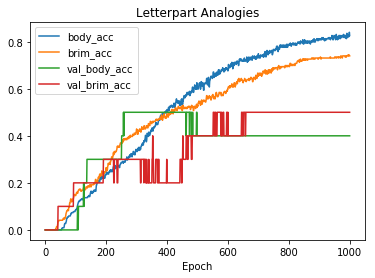

In [15]:
net.plot(".*acc")


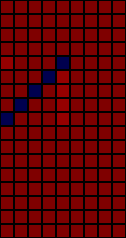
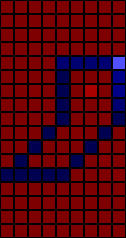
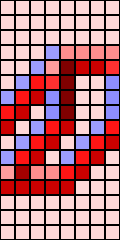
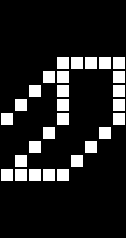

In [16]:
net.picture()

In [17]:
results = net.train_one(ds.inputs[8], ds.targets[1])

## Gridfonts - leter recognition


In [18]:
ds = cx.Dataset.get("gridfonts")

In [19]:
ds.summary()

_________________________________________________________________
Gridfonts:
Patterns    Shape                 Range                         
inputs      (25, 9)               (0.0, 1.0)                    
targets     (25, 9)               (0.0, 1.0)                    
Total patterns: 7462
   Training patterns: 7462
   Testing patterns: 0
_________________________________________________________________


In [20]:
net = cx.Network("Gridfonts")
net.add(cx.Layer("inputs", (25,9)))
net.add(cx.FlattenLayer("flatten"))
net.add(cx.Layer("hiddens", 20, activation="sigmoid"))
net.add(cx.Layer("outputs", (25, 9), activation="relu"))
net.connect()
net.compile(error="mse", optimizer="adam")

In [21]:
net.set_dataset(ds)

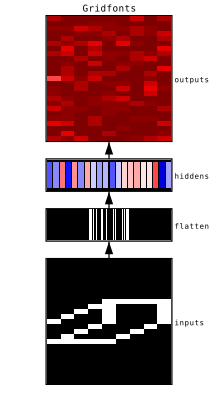

a


In [22]:
display(net)
output = net.propagate(ds.inputs[26])
print(ds.labels[26])

In [23]:
def display_letter(letter):
    print("Letter")
    for row in range(25):
        for col in range(9):
            print("." if letter[row][col] == 0 else "X", end="")
        print()

In [24]:
display_letter(ds.inputs[0])

Letter
.........
.........
.........
.........
.........
.........
.........
.........
....XXXXX
...XX...X
..X.X...X
.X..X...X
X...X...X
...X...X.
..X...X..
.X...X...
XXXXX....
.........
.........
.........
.........
.........
.........
.........
.........


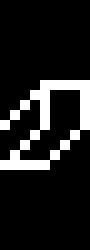

In [25]:
cx.array_to_image(ds.inputs[0], scale=10)

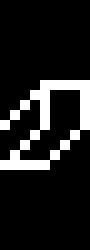

In [26]:
cx.array_to_image(ds.targets[0], scale=10)